# Document Analysis in Python
In this notebook we will cover:
- Reading document data into memory
- Creating bag of words features
- Creating smoothed tf-idf features

In [1]:
import requests
import json
from contextlib import closing

# get API key saved on hardrive
with open('../NYTimesAPI.txt') as f:
    api_key = f.read() # read in my private key (sorry, not in this repo ¯\_(ツ)_/¯ )
    
# make base URL and dictionary of get request key/values
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
payload = {'api-key': api_key, 'q':'Amazon'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url, params=payload)) as r:
    articles = r.json()
    
articles

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'web_url': 'https://www.nytimes.com/2019/08/26/opinion/amazon-rainforest-fire.html',
    'snippet': 'We need to figure out how to sustainably use the rain forest for the benefit of its inhabitants and the world. Give Brazil a hand without disrespecting its sovereignty.',
    'lead_paragraph': 'News Update: Brazil’s rejected the $22 million in aid pledged at the G7.',
    'abstract': 'We need to figure out how to sustainably use the rain forest for the benefit of its inhabitants and the world. Give Brazil a hand without disrespecting its sovereignty.',
    'print_page': '23',
    'blog': {},
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2019/08/26/opinion/26mangabeira/merlin_159715152_7ddac8a4-f80a-4074-834c-ac0fc2b7302a-article

In [ ]:
# OR we can load an example query like this
# run this block of code if you can't run anything else
import json 
with open('data/nytime.json') as f:
    articles = json.loads(f.read())
    
articles

In [2]:
# get the summary text from each article
#  lead_paragraph  is no snippet
summary_text = [x['snippet'] for x in articles['response']['docs']]
summary_text

['We need to figure out how to sustainably use the rain forest for the benefit of its inhabitants and the world. Give Brazil a hand without disrespecting its sovereignty.',
 'The number of fires raging in the Amazon rainforest this month is the highest in a decade, putting the environmental policies of Brazil’s president in the global spotlight.',
 'The raging fires are straining the usefulness of the concept of sovereignty.',
 'A global treasure lies at the mercy of the smallest, dullest, pettiest of men.',
 'The fires, most of which have been set by farmers clearing their land, are raging in uninhabited areas of rain forest and intruding on populated areas in the country’s north.',
 'The fires scorching the Amazon come amid growing concern that Brazil’s weakening environmental policies could jeopardize the country’s trade and foreign relations.',
 'Countries in the Amazon Basin are falling behind on their targets to cut deforestation. Environmental enforcement combined with economic 

# Converting document data into different representations
First lets go through and count the unique words in each opening sentence (that is what the NYTimes give us for free).
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # an object capable of counting words in a document!

# count_vect.fit(summary_text)
# count_vect.transform(summary_text)
bag_words = count_vect.fit_transform(summary_text)

In [4]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(10, 127)
  (0, 100)	1
  (0, 32)	1
  (0, 125)	1
  (0, 51)	1
  (0, 14)	1
  (0, 48)	1
  (0, 126)	1
  (0, 2)	1
  (0, 60)	1
  (0, 63)	2
  (0, 75)	1
  (0, 11)	1
  (0, 44)	1
  (0, 46)	1
  (0, 88)	1
  (0, 108)	3
  (0, 118)	1
  (0, 105)	1
  (0, 57)	1
  (0, 77)	1
  (0, 42)	1
  (0, 111)	2
  (0, 72)	1
  (0, 121)	1




# Self Test: ML01b.3: 
Do you expect the vocabulary from the articles above to be:
- A. Greater than 1M words
- B. Greater than 10,000 words
- C. Fewer than 10,000 words

_____


In [5]:
print(len(count_vect.vocabulary_))
print(count_vect.vocabulary_)

127
{'we': 121, 'need': 72, 'to': 111, 'figure': 42, 'out': 77, 'how': 57, 'sustainably': 105, 'use': 118, 'the': 108, 'rain': 88, 'forest': 46, 'for': 44, 'benefit': 11, 'of': 75, 'its': 63, 'inhabitants': 60, 'and': 2, 'world': 126, 'give': 48, 'brazil': 14, 'hand': 51, 'without': 125, 'disrespecting': 32, 'sovereignty': 100, 'number': 74, 'fires': 43, 'raging': 87, 'in': 58, 'amazon': 0, 'rainforest': 89, 'this': 110, 'month': 70, 'is': 62, 'highest': 55, 'decade': 29, 'putting': 86, 'environmental': 37, 'policies': 81, 'president': 83, 'global': 49, 'spotlight': 101, 'are': 3, 'straining': 103, 'usefulness': 119, 'concept': 20, 'treasure': 114, 'lies': 67, 'at': 6, 'mercy': 69, 'smallest': 99, 'dullest': 34, 'pettiest': 80, 'men': 68, 'most': 71, 'which': 123, 'have': 52, 'been': 9, 'set': 97, 'by': 16, 'farmers': 41, 'clearing': 17, 'their': 109, 'land': 65, 'uninhabited': 116, 'areas': 4, 'intruding': 61, 'on': 76, 'populated': 82, 'country': 24, 'north': 73, 'scorching': 95, 'co

In [6]:
# we can still look at the data using an inverse transform
# but we lose the ordering of the words (after all its just a bag of wrods model)
count_vect.inverse_transform(bag_words[0])

[array(['sovereignty', 'disrespecting', 'without', 'hand', 'brazil',
        'give', 'world', 'and', 'inhabitants', 'its', 'of', 'benefit',
        'for', 'forest', 'rain', 'the', 'use', 'sustainably', 'how', 'out',
        'figure', 'to', 'need', 'we'], dtype='<U17')]

In [7]:
# now let's create a pandas API out of this
import pandas as pd

pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [8]:
df # display the full bag of words matrix  

,amazon,amid,and,are,areas,as,at,backing,basin,been,behind,benefit,bolsonaro,bookstore,brazil,but,by,clearing,combined,come,concept,concern,could,countries,country,curb,current,cut,cutting,decade,defiant,deforestation,disrespecting,down,dullest,economic,enforcement,environmental,environmentalists,experience,falling,farmers,figure,fires,for,foreign,forest,forward,give,global,growing,hand,have,he,her,highest,his,how,in,incentives,inhabitants,intruding,is,its,jeopardize,land,lead,lies,men,mercy,month,most,need,north,number,of,on,out,over,owner,pettiest,policies,populated,president,promise,provide,putting,raging,rain,rainforest,rate,relations,rise,runaway,say,scorching,scorn,set,shares,smallest,sovereignty,spotlight,sticking,straining,strikes,sustainably,targets,that,the,their,this,to,tone,trade,treasure,trees,uninhabited,unwarranted,use,usefulness,way,we,weakening,which,with,without,world
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,2,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,2,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# print out 10 most common words in our data
df.sum().sort_values()[-10:]


environmental     3
is                3
deforestation     3
and               4
amazon            4
fires             5
to                6
in                8
of                9
the              21
dtype: int64

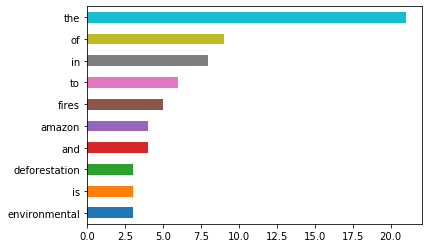

In [10]:
# plot the pandas data frame
%matplotlib inline
df.sum().sort_values()[-10:].plot(kind='barh')

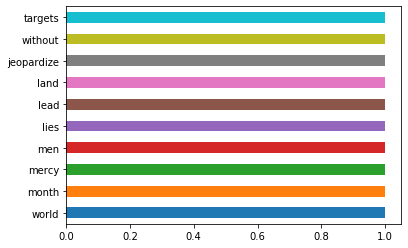

In [11]:
# print out 10 least common words in our data
df.sum().sort_values()[:10].plot(kind='barh') # small sample size means most words occur one time

# TF-IDF Conversion
We have a very small sample of data, but lets covert to tf-idf for the sake of programming it. Recall that Tf-idf transformation (default in `sklearn` is):

$$ \text{tf}(t,d) = f_{td}\text{, } t\in T \text{ and } d \in D $$

$$ \text{idf}(t,d) = \log{\frac{|D|}{|n_t|}}\text{, where } n_t=d\in D \text{ with } t\in d $$

$$\text{tf-idf}(t,d)=\text{tf}(t,d) \cdot (1+\text{idf}(t,d))$$

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() # an object capable of counting words in a document!

tfidf_mat = tfidf_vect.fit_transform(summary_text) # that's it! its converted!!

In [13]:
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

,amazon,amid,and,are,areas,as,at,backing,basin,been,behind,benefit,bolsonaro,bookstore,brazil,but,by,clearing,combined,come,concept,concern,could,countries,country,curb,current,cut,cutting,decade,defiant,deforestation,disrespecting,down,dullest,economic,enforcement,environmental,environmentalists,experience,falling,farmers,figure,fires,for,foreign,forest,forward,give,global,growing,hand,have,he,her,highest,his,how,in,incentives,inhabitants,intruding,is,its,jeopardize,land,lead,lies,men,mercy,month,most,need,north,number,of,on,out,over,owner,pettiest,policies,populated,president,promise,provide,putting,raging,rain,rainforest,rate,relations,rise,runaway,say,scorching,scorn,set,shares,smallest,sovereignty,spotlight,sticking,straining,strikes,sustainably,targets,that,the,their,this,to,tone,trade,treasure,trees,uninhabited,unwarranted,use,usefulness,way,we,weakening,which,with,without,world
0,0.000000,0.000000,0.129183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.145301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.195368,0.000000,0.166081,0.000000,0.195368,0.000000,0.000000,0.195368,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.195368,0.000000,0.000000,0.390737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.116014,0.000000,0.195368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166081,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.237348,0.000000,0.000000,0.290602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195368,0.000000,0.000000,0.195368,0.000000,0.000000,0.000000,0.195368,0.195368
1,0.140097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157576,0.000000,0.000000,0.000000,0.000000,0.000000,0.125815,0.000000,0.000000,0.000000,0.000000,0.000000,0.157576,0.000000,0.000000,0.000000,0.000000,0.000000,0.211873,0.000000,0.000000,0.420290,0.000000,0.000000,0.000000,0.157576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211873,0.000000,0.000000,0.000000,0.211873,0.251629,0.000000,0.000000,0.000000,0.000000,0.000000,0.180111,0.000000,0.157576,0.000000,0.000000,0.211873,0.157576,0.000000,0.211873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428999,0.000000,0.211873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.261838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.418123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261838,0.000000,0.000000

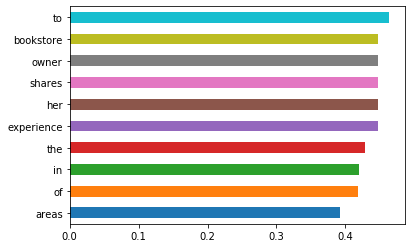

In [14]:
# print out 10 words with max tfidf, normalized by document occurrence
df.max().sort_values()[-10:].plot(kind='barh')

# Working with (a bit) more data
What if we do not have the memory to deal with dense matrix representatioan and we need to keep it sparse?


In [15]:
from sklearn.datasets import fetch_20newsgroups
bunch = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

the `bunch` object returned from sklearn is similar to a python dictionary. We can access different fields of the object with keys.

In [16]:
len(bunch.data)

11314

In [17]:
print(bunch.data[0]) # we should split this up by newlines

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [18]:
bunch.target_names[bunch.target[0]]

'rec.autos'

In [19]:
import numpy as np
#randomly grad an index
idx = round(np.random.rand()*len(bunch.data))
# and print it pretty
print("\n".join(bunch.data[idx].split("\n")))

From: abdkw@stdvax (David Ward)
Subject: Re: Keeping Spacecraft on after Funding Cuts.
News-Software: VAX/VMS VNEWS 1.4-b1  
Organization: Goddard Space Flight Center - Robotics Lab
Lines: 34

In article <20APR199321040621@kelvin.jpl.nasa.gov>, baalke@kelvin.jpl.nasa.gov (Ron Baalke) writes...
>In article <1993Apr20.204335.157595@zeus.calpoly.edu>, jgreen@trumpet.calpoly.edu (James Thomas Green) writes...
>>Why do spacecraft have to be shut off after funding cuts.  For
>>example, Why couldn't Magellan just be told to go into a "safe"
>>mode and stay bobbing about Venus in a low-power-use mode and if
>>maybe in a few years if funding gets restored after the economy
>>gets better (hopefully), it could be turned on again.  
> 
>It can be, but the problem is a political one, not a technical one.

Also remember that every dollar spent keeping one spacecraft in safe mode
(probably a spin-stabilized sun-pointing orientation) is a dollar not
spent on mission analysis for a newer spacecraft.  I

In [20]:
%%time
news_tfidf = tfidf_vect.fit_transform(bunch.data) 

CPU times: user 3.44 s, sys: 134 ms, total: 3.58 s
Wall time: 3.62 s


In [21]:
news_tfidf.shape

(11314, 130107)

In [22]:
tfidf_vect.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [23]:
# create pandas dataframe
vec = news_tfidf.max(axis=0)
df  = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())

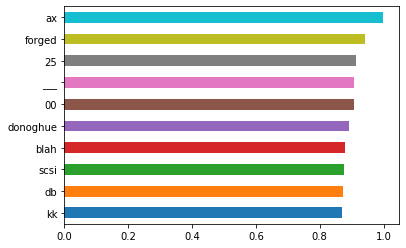

In [24]:
# largest tfidf 
df.max().sort_values()[-10:].plot(kind='barh')

(11314, 28592)


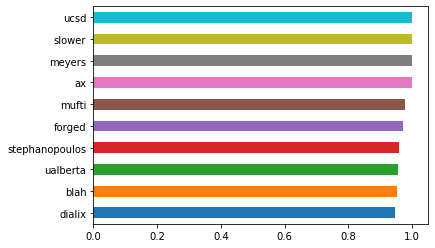

In [25]:
# now lets do the transformation with a smaller vocabulary
tfidf_vect = TfidfVectorizer(stop_words='english',
                             max_df=0.01,
                             min_df=4)
news_tfidf = tfidf_vect.fit_transform(bunch.data) 
print(news_tfidf.shape)
vec=news_tfidf.max(axis=0)
df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-10:].plot(kind='barh')

# Using your own vocabulary

(11314, 79340)


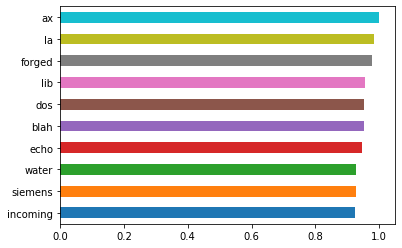

In [26]:
# read in scrabble dictionary from file
with open('data/ospd.txt') as f:
    vocab = f.read().split('\n')
    
# now lets do the transformation with a custom vocabulary
tfidf_vect = TfidfVectorizer(vocabulary=vocab)
news_tfidf = tfidf_vect.fit_transform(bunch.data) 
print(news_tfidf.shape)
vec=news_tfidf.max(axis=0)
df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-10:].plot(kind='barh')

Looking for how to do a word cloud? Check this out:
- https://github.com/amueller/word_cloud

Want to perform more serious NLP with richer options:
- http://www.nltk.org